In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [2]:
def KmeansCluster(df,k):
  
  scaler = StandardScaler()
  df = scaler.fit_transform(df)

  km = KMeans(k)
  km.fit(df)
  
  pred = km.predict(df)
  centroids = km.cluster_centers_
  labels = km.labels_
  
  score=silhouette_score(df,labels, metric='euclidean')
  print(f'silhoutte Score is {score} ')
  sns.scatterplot(df[:,0], df[:,1], hue=pred)
  sns.scatterplot(centroids[:,0], centroids[:,1], color='y', s=50)


In [3]:
def hier_cluser(df, k):
  #scale data
  scaler = StandardScaler()
  df = scaler.fit_transform(df)
  
  ac = AgglomerativeClustering(n_clusters = k)
  ac.fit(df)
  
  pred = ac.fit_predict(df)
  labels = ac.labels_
  score=silhouette_score(df,labels, metric='euclidean')
  print(f'silhoutte Score is {score} ')
  
  sns.scatterplot(df[:,0], df[:,1], hue=pred, palette='Spectral')



In [4]:
def dbscan(df, e, n_points):
  #scale data
  scaler = StandardScaler()
  df = scaler.fit_transform(df)

  db = DBSCAN(eps=e, min_samples=n_points)
  db.fit(df)
  
  pred = db.fit_predict(df)
  labels = db.labels_
  score=silhouette_score(df,labels, metric='euclidean')
  print(f'silhoutte Score is {score} ')

  sns.scatterplot(df[:,0], df[:,1], hue=pred)



In [5]:
def gauss(data, comp_num):
  #scale data
  scaler = StandardScaler()
  data = scaler.fit_transform(data)
  #apply method
  gm = GaussianMixture(n_components=comp_num)
  gm.fit(data)
  
  pred = gm.predict(data)
  score=silhouette_score(data,pred, metric='euclidean')
  print(f'silhoutte Score is {score} ')
  #plotting
  sns.scatterplot(data[:,0], data[:,1], hue=pred, palette='magma')

In [6]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")
d1.head()

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


silhoutte Score is 0.43992489383941363 


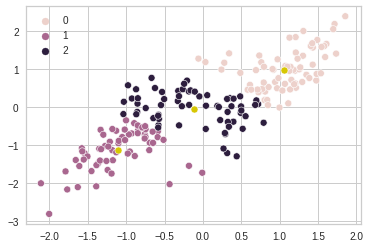

In [7]:
KmeansCluster(d1,3);

silhoutte Score is 0.4156770762598497 


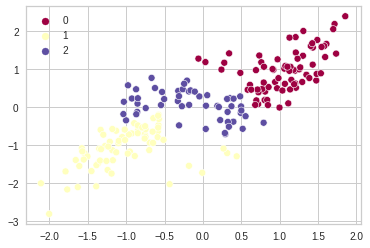

In [8]:
hier_cluser(d1,3);


silhoutte Score is 0.10037514309943768 


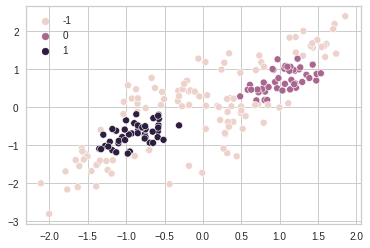

In [9]:
dbscan(d1,0.3,15);

silhoutte Score is 0.45114087997192337 


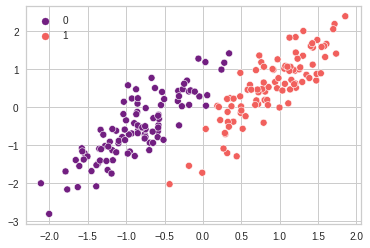

In [10]:
gauss(d1,2) ##

## Dataset 2

In [11]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

d2.head()

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


silhoutte Score is 0.558315766313531 


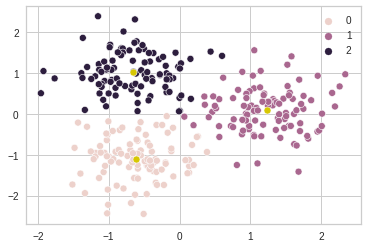

In [12]:
KmeansCluster(d2,3) ##

silhoutte Score is 0.5331004784160975 


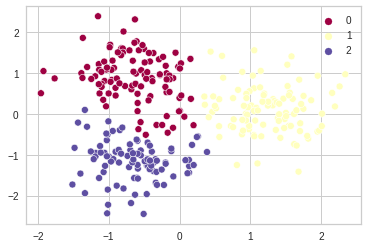

In [13]:
hier_cluser(d2,3)

silhoutte Score is 0.4475723502054037 


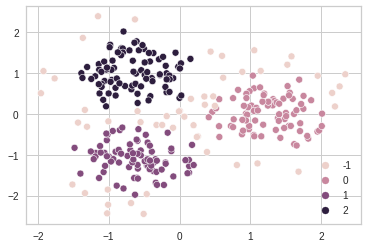

In [57]:
dbscan(d2,0.4,15
       
       )

silhoutte Score is 0.558315766313531 


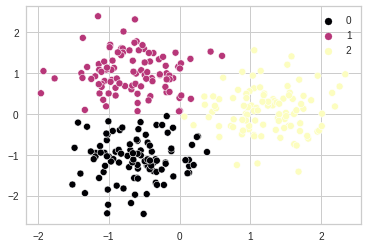

In [15]:
gauss(d2,3)##

## Dataset 3

In [16]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

silhoutte Score is 0.913619050733588 


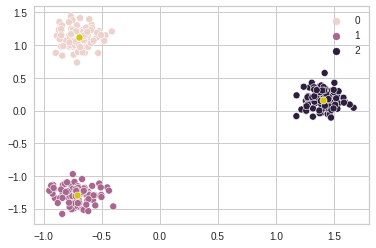

In [17]:
KmeansCluster(d3,3)

silhoutte Score is 0.913619050733588 


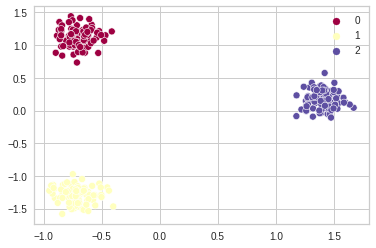

In [18]:
hier_cluser(d3,3)

silhoutte Score is 0.913619050733588 


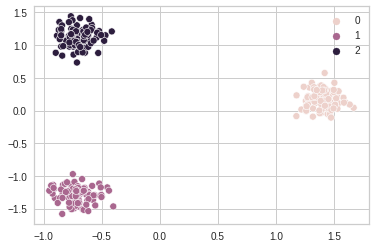

In [19]:
dbscan(d3,0.3,15)

silhoutte Score is 0.913619050733588 


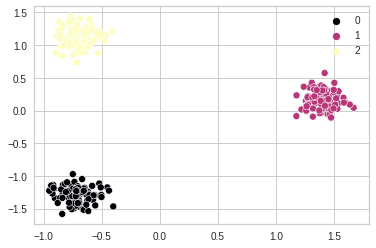

In [20]:
gauss(d3,3)

## Dataset 4

In [21]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")


silhoutte Score is 0.37428500782082524 


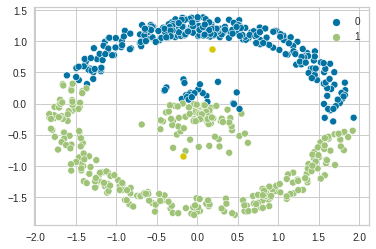

In [22]:
KmeansCluster(d4,2)

silhoutte Score is 0.360199832511491 


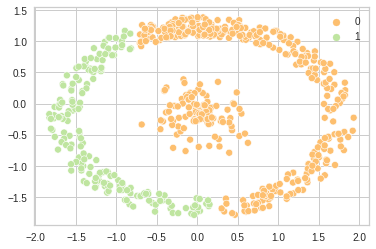

In [23]:
hier_cluser(d4,2)

silhoutte Score is -0.042911477754913246 


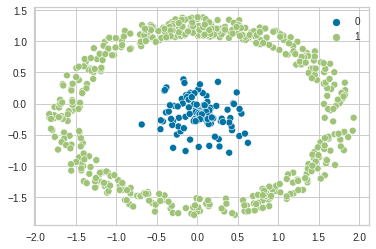

In [24]:
dbscan(d4,0.3,10)##

silhoutte Score is 0.2862051350533255 


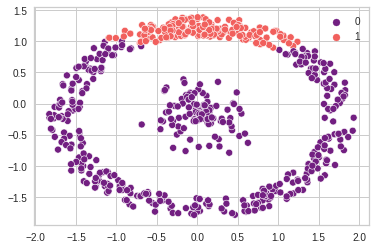

In [25]:
gauss(d4,2)

### Compare

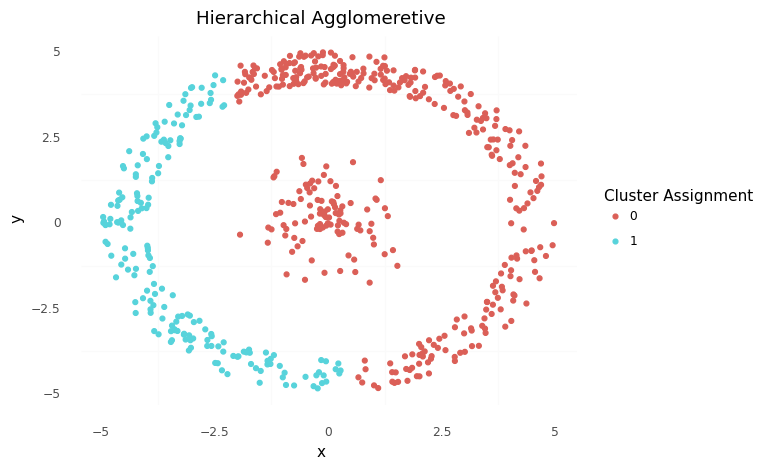

<ggplot: (8771636296009)>


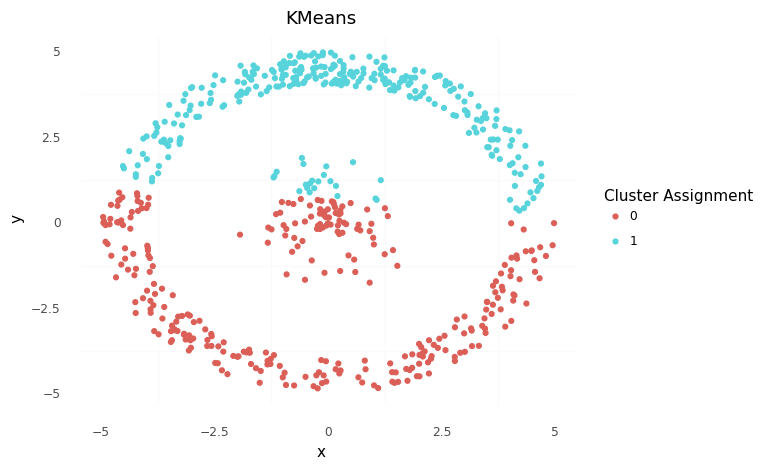

<ggplot: (8771636232405)>


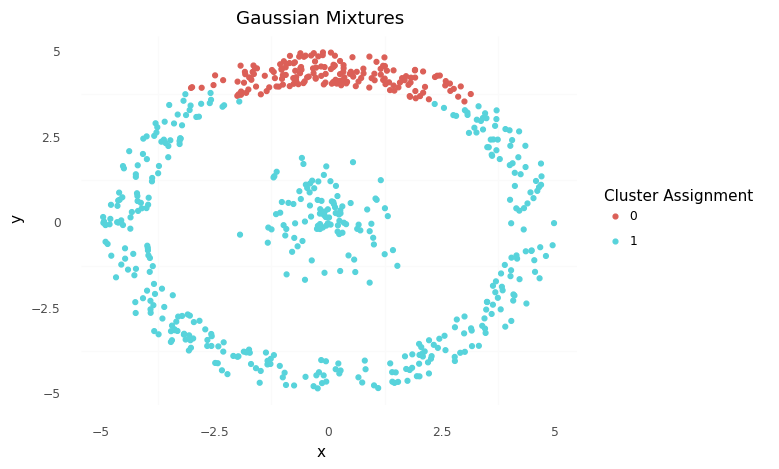

<ggplot: (8771636290537)>


In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

In [27]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")


silhoutte Score is 0.7043537508086658 


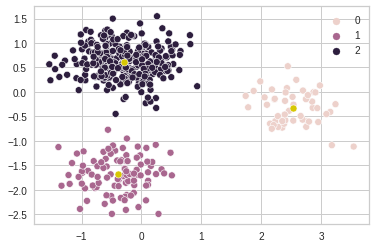

In [28]:
KmeansCluster(d5,3)##

silhoutte Score is 0.7031189213721805 


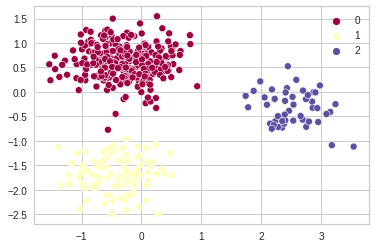

In [29]:
hier_cluser(d5,3)

silhoutte Score is 0.6700704240910447 


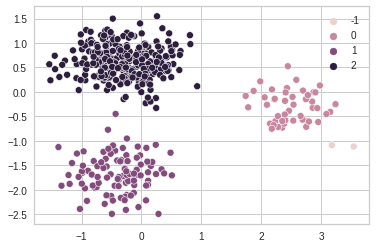

In [30]:
dbscan(d5,0.5,7)

silhoutte Score is 0.7043537508086658 


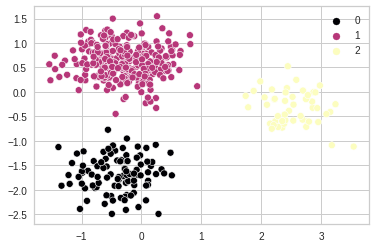

In [33]:
gauss(d5,3)##

# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

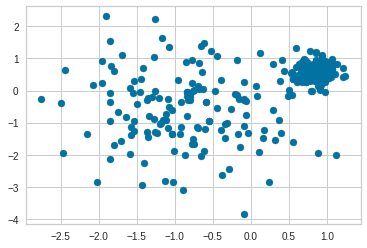

In [34]:
import matplotlib.pyplot as plt

d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")
plt.scatter(d6['x'],d6.y)

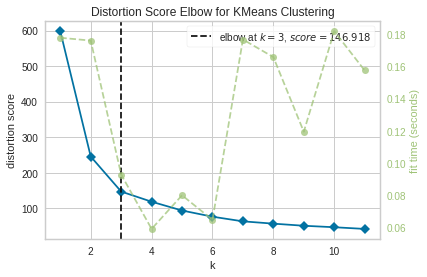

In [35]:
model1 = KMeans(10)
visualizer = KElbowVisualizer(model1, k=(1,12))

visualizer.fit(d6)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

silhoutte Score is 0.5861497443577426 


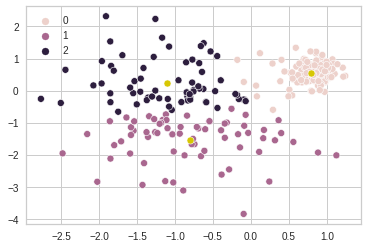

In [36]:
KmeansCluster(d6,3)##

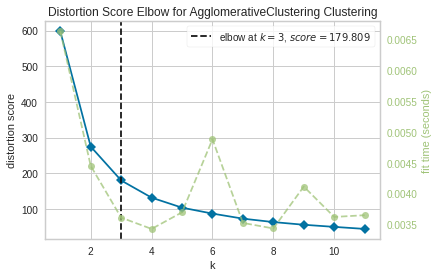

In [37]:
model2= AgglomerativeClustering()
visualizer = KElbowVisualizer(model2, k=(1,12))

visualizer.fit(d6)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

silhoutte Score is 0.5228726587928137 


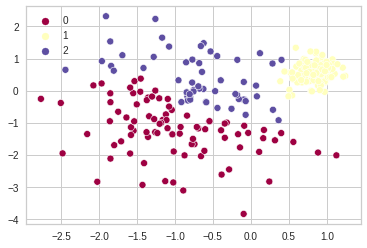

In [38]:
hier_cluser(d6,3)

silhoutte Score is 0.523629650344957 


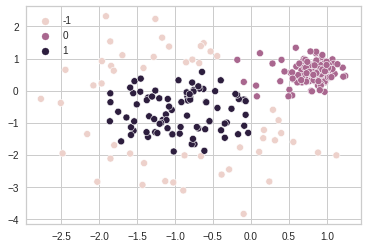

In [39]:
dbscan(d6,0.5,15
       )

silhoutte Score is 0.5228726587928137 


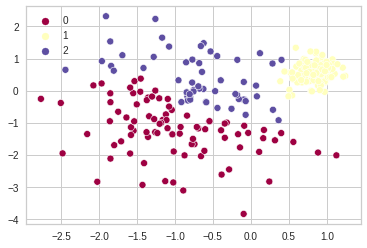

In [40]:
hier_cluser(d6,3)

silhoutte Score is 0.5861497443577426 


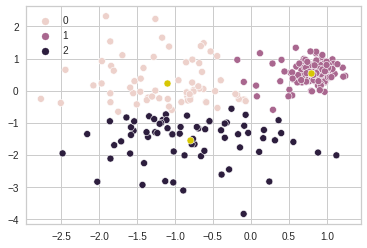

In [41]:
KmeansCluster(d6,3)

silhoutte Score is 0.5697616522341274 


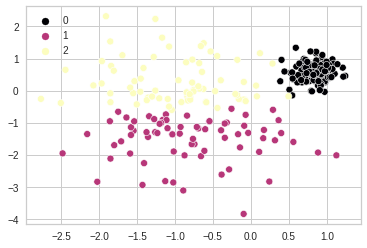

In [42]:
gauss(d6,3)